In [4]:
# ==============================================================================
# Import modules
# ==============================================================================

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

['petal length (cm)', 'petal width (cm)']
X:  [[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.

<Axes: >

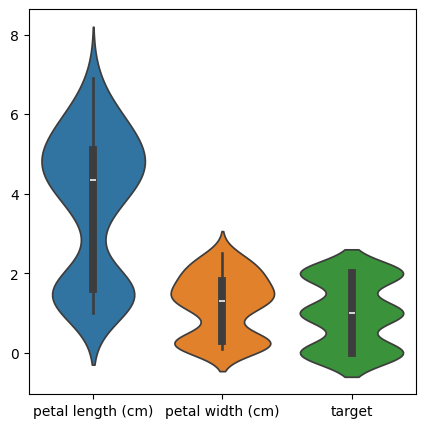

In [5]:
# ==============================================================================
# Load data and select features
# ==============================================================================

iris = datasets.load_iris()
features = [2, 3]
X = iris.data[:, features]
y = iris.target
feature_names = [iris.feature_names[i] for i in features]

print(feature_names)
print('X: ', X)
print('\ny: ', y)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
sns.violinplot(data=df, ax=ax)

In [22]:
# ==============================================================================
# Split into training and test data
# ==============================================================================

# Print lables of all classes in data set
print("Class labels:", np.unique(y))


# Split data into training and test data (70% training, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)


# Show distribution of classes in input data, training data and test data
print(f"Labels counts in y: {np.bincount(y)}")
print(f"Labels counts in y_train: {np.bincount(y_train)}")
print(f"Labels counts in y_test: {np.bincount(y_test)}")


# Show distribution of classes in input data, training data and test data
# Alternative 2
unique, counts = np.unique(y, return_counts=True)
print("Labels counts in y:", unique, counts)

unique, counts = np.unique(y_train, return_counts=True)
print("Labels counts in y_train:", unique, counts)

unique, counts = np.unique(y_test, return_counts=True)
print("Labels counts in y_test:", unique, counts)

Class labels: [0 1 2]
Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]
Labels counts in y: [0 1 2] [50 50 50]
Labels counts in y_train: [0 1 2] [35 35 35]
Labels counts in y_test: [0 1 2] [15 15 15]


Mean of X_train_sc: [5.70971841e-17 7.19001578e-17]
Stddev of X_train_sc: [1. 1.]


<Axes: >

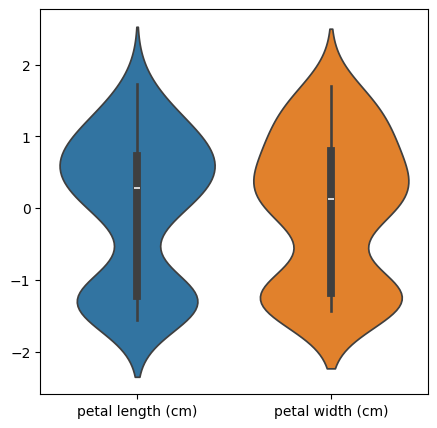

In [18]:
# ==============================================================================
# Scale features using StandardScaler class in scikit-learn
# ==============================================================================

# Initialise standard scaler and compute mean and stddev from training data
sc = StandardScaler()
sc.fit(X_train)

# Transform (standardise) both X_train and X_test with mean and stddev from
# training data

# GIVES ALL MEAN=0 AND STDDEV=1 (5.7e-17 and 7.19e-17 is basically 0)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

print("Mean of X_train_sc:", np.mean(X_train_sc, axis=0))
print("Stddev of X_train_sc:", np.std(X_train_sc, axis=0))

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
df = pd.DataFrame(X_train_sc, columns=feature_names)
# df['target'] = y_train
sns.violinplot(data=df, ax=ax)

In [24]:
# ==============================================================================
# Train multiclass perceptron of scikit-learn
# ==============================================================================

# Initialise the model (max iterations / epochs, learning rate = 0.1)
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)

# This computes the Gradient Descent:
ppn.fit(X_train_sc, y_train)

Perceptron(eta0=0.1, max_iter=40, random_state=1)

In [26]:
# ==============================================================================
# Make predictions for the test set
# ==============================================================================

# Predict classes for samples in test set and print number of misclassfications
y_pred = ppn.predict(X_test_sc)
print((y_test != y_pred))
print("Misclassified samples: {0}".format((y_test != y_pred).sum()))

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False]
Misclassified samples: 1


In [27]:
# ==============================================================================
# Compute performance metrics
# ==============================================================================

num_misclassified = (y_test != y_pred).sum()
print("Accuracy: {0:.2f}".format(1.0 - num_misclassified / len(y_test)))

# Print accuracy computed from predictions on the test set
print("Accuracy: {0:.2f}".format(accuracy_score(y_test, y_pred)))


# Print accuracy computed from predictions on the test set (this one does the ppn.predict() and accuracy_score() in one step)
print("Accuracy: {0:.2f}".format(ppn.score(X_test_sc, y_test)))

Accuracy: 0.98
Accuracy: 0.98
Accuracy: 0.98


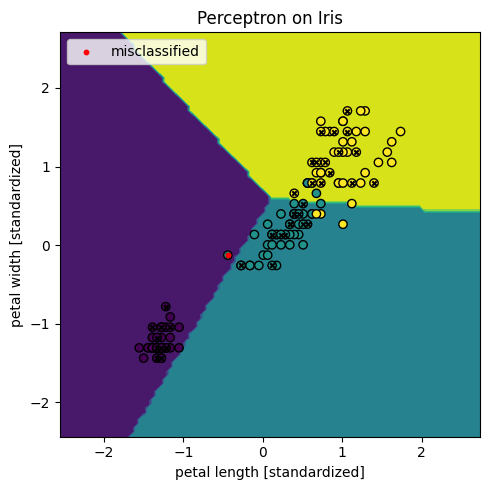

In [28]:
# ==============================================================================
# Plot results with plot function for decision regions using scikit-learn
# ==============================================================================

X_combined_sc = np.vstack((X_train_sc, X_test_sc))
y_combined = np.hstack((y_train, y_test))

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

plot = DecisionBoundaryDisplay.from_estimator(
    estimator=ppn,
    X=X_combined_sc,
    alpha=1.0,
    ax=ax,
    response_method="predict",
    xlabel="petal length [standardized]",
    ylabel="petal width [standardized]",
)

plot.ax_.scatter(X_combined_sc[:, 0], X_combined_sc[:, 1], c=y_combined, marker="o", edgecolor="k")

# Highlight test samples
plot.ax_.scatter(
    X_test_sc[:, 0],
    X_test_sc[:, 1],
    marker="x",
    s=10,
    c="k",
)

# Highlight misclassified test samples
plot.ax_.scatter(
    X_test_sc[y_test != y_pred, 0],
    X_test_sc[y_test != y_pred, 1],
    marker="o",
    s=10,
    c="r",
    facecolors="none",
    label="misclassified",
)

plt.legend(loc="upper left")
plt.title("Perceptron on Iris")
plt.tight_layout()
plt.show()